<a href="https://colab.research.google.com/github/honggi82/computer_vision/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000 10000
5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565 - accuracy: 0.9262
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9664
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9765
Epoch 4/25
1875/1875 [==============================] - 4s 2

[0.139397531747818, 0.9767000079154968]

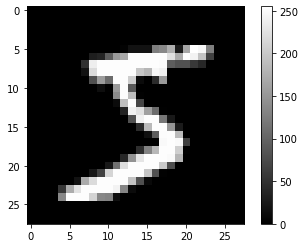

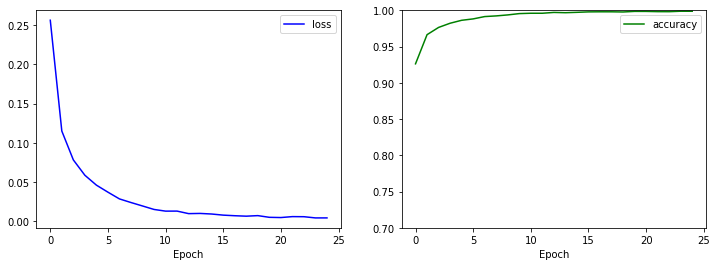

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(len(train_X), len(test_X))

# 데이터 확인
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
print(train_Y[0])

# 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0
# MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

# MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25)

# MNIST 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

# MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)